# Questions

1. What fraction of payments under \$5 use a credit card?
1. What fraction of payments over \$50 use a credit card?
1. What is the mean fare per minute driven?
1. What is the median of the taxi's fare per mile driven?
1. What is the average ratio of the distance between the pickup and dropoff divided by the distance driven?
1. What is the 95 percentile of the taxi's average driving speed in miles per hour?
1. What is the average tip for rides from JFK?
1. What is the median March revenue of a taxi driver?

## Load both datasets, drop unnecessary columns, join

In [1]:
import pandas as pd
import numpy as np

fareFile = "trip_fare_3.csv"
df1 = pd.read_csv(fareFile, header=0, engine='c')

columnNames = df1.columns.values
df1 = df1.drop(columnNames[[0, 2, 6, 7, 9]],axis=1)

dataFile = "trip_data_3.csv"
df2 = pd.read_csv(dataFile, header=0, engine='c')

columnNames = df2.columns.values
df2 = df2.drop(columnNames[[0, 2, 3, 4, 7]],axis=1)

df = pd.merge(df1,df2, how = 'inner')
del df1; del df2;

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
# Strip spaces from row headers
df = df.rename(columns=lambda x: x.strip())
df.head()

,hack_license,pickup_datetime,payment_type,fare_amount,tip_amount,total_amount,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2C78614ADC9C602EC70D65CCB4E63B14,2013-03-01 00:00:04,CRD,39.5,10.10,50.60,2013-03-01 00:19:03,1138,14.3,-73.776703,40.645164,-73.913925,40.772614
1,08BF18740B38D64720C9E060429A3968,2013-03-01 00:00:18,CRD,13.0,2.10,16.10,2013-03-01 00:12:11,712,3.3,-73.987343,40.752056,-73.965340,40.792721
2,F3310C8DA3DB753DDB5800F32D3CB8E3,2013-03-01 00:00:18,CRD,15.0,3.20,19.20,2013-03-01 00:14:24,845,4.5,-73.991493,40.726444,-73.980865,40.778370
3,DF142C5256392C3CDA67C7DFFA5B88E2,2013-03-01 00:00:23,CRD,25.5,6.26,37.56,2013-03-01 00:14:56,872,9.0,-73.873108,40.774094,-73.960930,40.769535
4,10D2E58D75E07D6B5AAFA329BF5A4CAC,2013-03-01 00:00:35,CRD,6.5,1.00,8.50,2013-03-01 00:05:44,308,1.3,-73.990562,40.750927,-73.982880,40.739132


In [3]:
df.describe()

,fare_amount,tip_amount,total_amount,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15749492.000000,15749492.000000,15749492.000000,15749492.000000,15749492.000000,15749492.000000,15749492.000000,15749199.000000,15749199.000000
mean,12.035129,1.307660,14.395482,717.443336,2.841457,-72.676494,40.036586,-72.635172,40.014959
std,9.816440,2.101171,11.751894,521.272755,3.316191,10.033677,6.941685,10.069558,7.123386
min,2.500000,0.000000,2.500000,0.000000,0.000000,-2316.636500,-3124.489700,-2491.220000,-3547.897200
25%,6.500000,0.000000,8.000000,360.000000,1.020000,-73.992188,40.734612,-73.991486,40.733704
50%,9.000000,0.900000,11.000000,600.000000,1.760000,-73.982002,40.752274,-73.980499,40.752590
75%,13.500000,2.000000,16.000000,921.000000,3.180000,-73.967209,40.766754,-73.964027,40.767635
max,500.000000,200.000000,529.800000,10800.000000,100.000000,2945.958700,3210.385500,1347.443700,3453.317400


### Clean data

In [4]:
latMax = 41.0; latMin = 40.0;
lonMax = -73.5; lonMin = -74.5;
timeMax = 3600.0; timeMin = 0.0;
totalFareMax = 300.0; totalFareMin = 0.0; # Trips must be longer than 0 seconds
tripDistMax = 60.0; tripDistMin = 0.0; # Unlikely anyone went further than 60 miles

# Identify erroneous latitude values
df = df[(df['pickup_latitude'] <= latMax) & (df['pickup_latitude'] >= latMin)]
df = df[(df['dropoff_latitude'] <= latMax) & (df['dropoff_latitude'] >= latMin)]

# Identify erroneous longitude values
df = df[(df['pickup_longitude'] <= lonMax) & (df['pickup_longitude'] >= lonMin)]
df = df[(df['dropoff_longitude'] <= lonMax) & (df['dropoff_longitude'] >= lonMin)]

# Eliminate erroneous trip times
df = df[(df['trip_time_in_secs'] < timeMax) & (df['trip_time_in_secs'] > timeMin)]

# Eliminate erroneous fare amounts
df = df[(df['fare_amount'] < totalFareMax) & (df['fare_amount'] > totalFareMin)]

# Eliminate erroneous trip distances
df = df[(df['trip_distance'] < tripDistMax) & (df['trip_distance'] > tripDistMin)]

In [5]:
df.describe()

,fare_amount,tip_amount,total_amount,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15354355.000000,15354355.000000,15354355.000000,15354355.000000,15354355.000000,15354355.000000,15354355.000000,15354355.000000,15354355.000000
mean,11.865569,1.289745,14.200655,713.167625,2.824979,-73.975941,40.750735,-73.975045,40.751039
std,9.149321,2.002305,11.038322,492.793023,3.212001,0.033431,0.026801,0.033053,0.030573
min,2.500000,0.000000,2.500000,1.000000,0.010000,-74.500000,40.000000,-74.500000,40.000000
25%,6.500000,0.000000,8.000000,360.000000,1.040000,-73.992386,40.736137,-73.991676,40.735153
50%,9.000000,1.000000,11.000000,600.000000,1.780000,-73.982246,40.752857,-73.980927,40.753239
75%,13.500000,2.000000,16.000000,919.000000,3.190000,-73.968437,40.767181,-73.965714,40.768032
max,285.000000,200.000000,373.420000,3599.000000,59.900000,-73.500000,41.000000,-73.500000,41.000000


# Answering questions about fares

## Find types of payment

In [53]:
paymentTypes = df['payment_type'].unique()
print paymentTypes

['CRD' 'CSH' 'UNK' 'NOC' 'DIS']


### What fraction of payments under $5 use a credit card?

In [6]:
smallFares = df[(df['total_amount'] <= 5)]
smallFaresCnt = len(smallFares.index)
del smallFares

smallFaresWCredit = df[ (df['total_amount'] <= 5) & (df['payment_type'] == "CRD")]
smallFaresWCreditCnt = len(smallFaresWCredit.index)
del smallFaresWCredit

print "Fraction of payments under $5 using a credit card: " + str(float(smallFaresWCreditCnt)/float(smallFaresCnt))

Fraction of payments under $5 using a credit card: 0.082926477346


### What fraction of payments over $50 use a credit card?

In [7]:
largeFares = df[(df['total_amount'] > 50)]
largeFaresCnt = len(largeFares.index)
del largeFares

largeFaresWCredit = df[ (df['total_amount'] > 50) & (df['payment_type'] == "CRD")]
largeFaresWCreditCnt = len(largeFaresWCredit.index)
del largeFaresWCredit

print "Fraction of payments over $50 using a credit card: " + str(float(largeFaresWCreditCnt)/float(largeFaresCnt))

Fraction of payments over $50 using a credit card: 0.688368201761


### What is the median March revenue of a taxi driver?

In [8]:
grouped = df.groupby('hack_license').sum()

myData = np.empty([1,1])
myData = grouped['total_amount'].values
print ("Median total revenue for cab drivers in March: " + str(np.median(myData)))
print ("Mean total revenue for cab drivers in March: " + str(np.mean(myData)))

Median total revenue for cab drivers in March: 6983.3
Mean total revenue for cab drivers in March: 6655.12595306


### What is the mean fare per minute driven?

In [9]:
farePerMinute = np.empty([1,1])
farePerMinute = 60.0*df['fare_amount'].values / df['trip_time_in_secs'].values
print "Mean fare per minute driven: " + str(np.mean(farePerMinute))
print "Median fare per minute driven: " + str(np.median(farePerMinute))

Mean fare per minute driven: 1.16002035737
Median fare per minute driven: 1.0


### What is the median of the taxi's fare per mile driven?

In [10]:
farePerMile = np.empty([1,1])
farePerMile = df['fare_amount'].values / df['trip_distance'].values
print "Mean fare per mile driven: " + str(np.median(farePerMile))
print "Median fare per mile driven: " + str(np.median(farePerMile))

Mean fare per mile driven: 5.0
Median fare per mile driven: 5.0


# Answering questions about routes and distance

### What is the average ratio of the distance between the pickup and dropoff divided by the distance driven?

In [11]:
from math import cos, sqrt, radians

def coordsToMiles(startLat,startLon,endLat,endLon):
    endLon = radians(endLon); startLon = radians(startLon);
    endLat = radians(endLat); startLat = radians(startLat);
    
    R = 6371*0.621  # radius of the earth in miles
    x = (endLon - startLon) * cos( 0.5*(endLat+startLat) )
    y = endLat - startLat
    d = R*sqrt(x**2 + y**2)    
    return d

startLat = df['pickup_latitude'].values; startLon = df['pickup_longitude'].values;
endLat = df['dropoff_latitude'].values; endLon = df['dropoff_longitude'].values;

routeDist = np.empty(len(startLat))

for i in range(len(startLat)):
    routeDist[i] = coordsToMiles(startLat[i],startLon[i],endLat[i],endLon[i])


In [12]:
print np.mean(routeDist)
print np.median(routeDist)
print np.max(routeDist)
print np.min(routeDist)

2.05344197376
1.340803329
57.7640205618
0.0


In [13]:
routeRatio = np.empty([1,1])
routeRatio = np.divide(routeDist, df['trip_distance'].values)
print "The mean ratio of the distance between pickup and dropoff divide by distance driven is: " + str(np.mean(routeRatio))

The mean ratio of the distance between pickup and dropoff divide by distance driven is: 0.807658475673


### What is the 95th percentile of the taxi's average driving speed in miles per hour?

In [14]:
taxiSpeed = np.empty([1,1])
taxiSpeed = 3600*df['trip_distance'].values/df['trip_time_in_secs']
print "The 95th percentile of taxis' average driving speed in mph is: " + str(np.percentile(taxiSpeed, 95.0))

The 95th percentile of taxis' average driving speed in mph is: 26.6


### What is the average tip for rides from JFK?

In [15]:
jfkLatMin = 40.626; jfkLatMax = 40.663; # Obtained from Google Maps
jfkLonMin = -73.821; jfkLonMax =-73.758; # Obtained from Google Maps

jfkTrips = df[ (df['pickup_latitude'] > jfkLatMin) & (df['pickup_latitude']<jfkLatMax) &
              (df['pickup_longitude'] > jfkLonMin) & (df['pickup_longitude']<jfkLonMax)]

jfkTips = np.empty([1,1])
jfkTips = jfkTrips['tip_amount'].values
print "The average tip for rides from JFK is: " + str(np.mean(jfkTips))
print "The median tip for rides from JFK is: " + str(np.median(jfkTips))

The average tip for rides from JFK is: 4.41857393728
The median tip for rides from JFK is: 0.0


Populating the interactive namespace from numpy and matplotlib


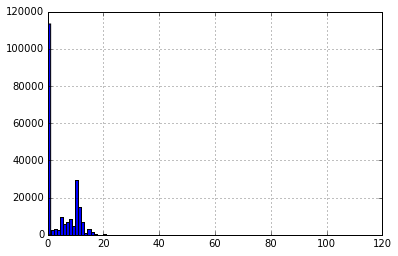

In [95]:
%pylab inline
seriesTips = pd.Series(data = jfkTips)
seriesTips.hist(bins = 100)

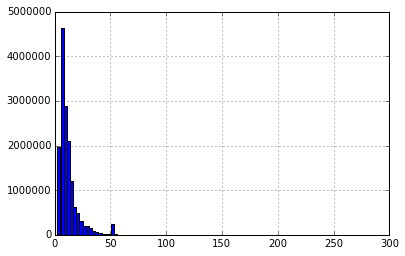

In [96]:
df['fare_amount'].hist(bins = 100)